C:\Users\Annie\Desktop\Jupyter Notebooks


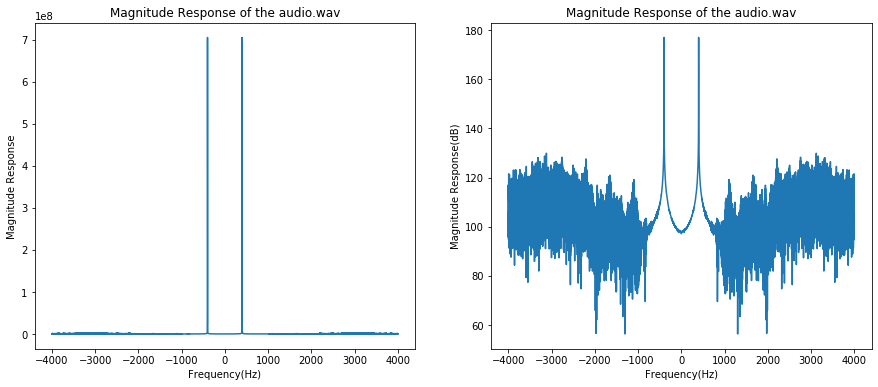

In [4]:
import os, math
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.io.wavfile import read
from IPython.display import Audio
print(os.getcwd())
sampling_rate, data = read('with_hum.wav')
Audio('with_hum.wav')

fft = np.fft.fft(data)
fft = np.fft.fftshift(fft)
x_label = np.linspace(-4000,4000,len(fft))

plt.figure(figsize=(15, 6))
plt.subplot(121)
plt.title('Magnitude Response of the audio.wav')
plt.xlabel('Frequency(Hz)')
plt.ylabel('Magnitude Response')
plt.plot(x_label, np.absolute(fft))

plt.subplot(122)
plt.title('Magnitude Response of the audio.wav')
plt.xlabel('Frequency(Hz)')
plt.ylabel('Magnitude Response(dB)')
plt.plot(x_label, 20*np.log10(np.absolute(fft)))
plt.show()

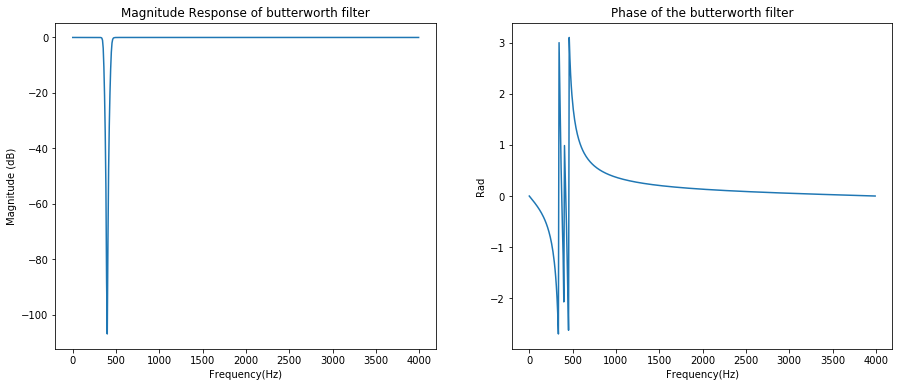

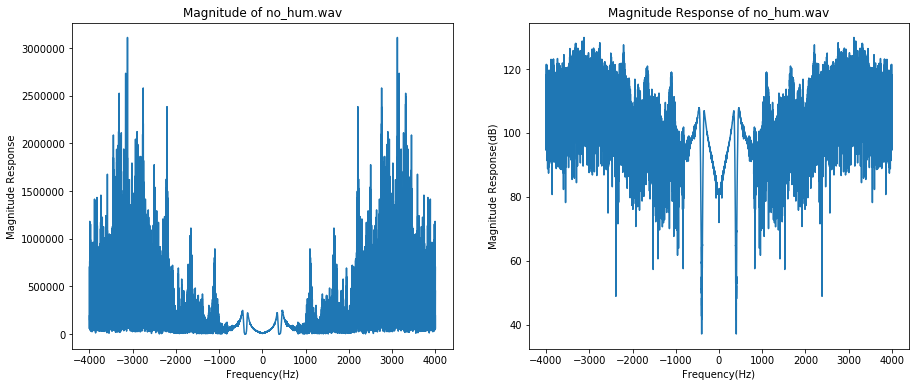

In [8]:
import os
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.io.wavfile import read, write
from IPython.display import Audio

sampling_rate, data = read('with_hum.wav')
Audio('with_hum.wav')
NyqR = sampling_rate/2
band = [350/NyqR, 450/NyqR]
nume, denom = signal.butter(5, band, btype = 'bandstop',analog = False)
w, h = signal.freqz(nume, denom)

plt.figure(figsize=(15, 6))
plt.subplot(121)
plt.title('Magnitude Response of butterworth filter')
plt.xlabel('Frequency(Hz)')
plt.ylabel('Magnitude (dB)')
plt.plot(w*NyqR/np.pi, 20*np.log10(h))
#plt.figure(figsize=(15, 6))
plt.subplot(122)
plt.title('Phase of the butterworth filter')
plt.xlabel('Frequency(Hz)')
plt.ylabel('Rad')
plt.plot(w*NyqR/np.pi, np.angle(h))
plt.show()

f_data = signal.lfilter(nume, denom, data).astype('int16')
write("no_hum.wav", data = f_data, rate = sampling_rate)
Audio("no_hum.wav")

fft = np.fft.fftshift(np.fft.fft(f_data))
x_label = np.linspace(-4000,4000,len(fft))

plt.figure(figsize=(15, 6))
plt.subplot(121)
plt.title('Magnitude of no_hum.wav')
plt.xlabel('Frequency(Hz)')
plt.ylabel('Magnitude Response')
plt.plot(x_label, np.absolute(fft))
#plt.figure(figsize=(15, 6))
plt.subplot(122)
plt.title('Magnitude Response of no_hum.wav')
plt.xlabel('Frequency(Hz)')
plt.ylabel('Magnitude Response(dB)')
plt.plot(x_label, 20*np.log10(np.absolute(fft)))
plt.show()


In [6]:
"""
Question:
Briefly describe your filter design. Why does your filter have the number of taps that it has? 
Could you achieve the same effect with less taps? What are the practical effects of using less taps?

I designed a band-stop butterworth filter with the function signal.butter()
which filters out the frequency at 400Hz (centered at 400Hz) with attenuation
of about 110dB in order to decrease the effect of the hum.

The numtap (I understand it as order) is set to 5, which allows the attenuation reach a lower dB than
smaller numbers.
I have tried 1, 3, and 5, and the result was that the higher the order is, the lower dB we get in the stop band.
Setting numtaps to a smaller number might end up with bad listening effect.
"""

'\nQuestion:\nBriefly describe your filter design. Why does your filter have the number of taps that it has? \nCould you achieve the same effect with less taps? What are the practical effects of using less taps?\n\nI designed a band-stop butterworth filter with the function signal.butter()\nwhich filters out the frequency at 400Hz (centered at 400Hz) with attenuation\nof about 110dB in order to decrease the effect of the hum.\n\nThe numtap (I understand it as order) is set to 5, which allows the attenuation reach a lower dB than\nsmaller numbers.\nI have tried 1, 3, and 5, and the result was that the higher the order is, the lower dB we get in the stop band.\nSetting numtaps to a smaller number might end up with bad listening effect.\n'